In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir('../..')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [2]:
infile = 's5-enrichr.dir/l1000-enrichment_table.txt'

In [49]:
infiles = glob.glob('s5-enrichr.dir/tables/*')

In [58]:
enrichment_dataframe = pd.read_table(infile, index_col='term_name')
enrichment_dataframe.head()

,alpelisib_0.04_24,alpelisib_0.04_3,alpelisib_0.12_24,alpelisib_0.12_3,alpelisib_0.37_24,alpelisib_0.37_3,alpelisib_1.11_24,alpelisib_1.11_3,alpelisib_10.0_24,alpelisib_10.0_3,...,palbociclib_10.0_3,palbociclib_3.33_24,palbociclib_3.33_3,trametinib_0.37_24,trametinib_1.11_24,trametinib_1.11_3,trametinib_10.0_24,trametinib_10.0_3,trametinib_3.33_24,trametinib_3.33_3
term_name,,,,,,,,,,,,,,,,,,,,,
'de novo' posttranslational protein folding (GO:0051084),0.884659,0.940144,-0.534285,-0.891934,0.517339,0.821885,0.938681,0.931617,0.000000,-0.532487,...,0.546736,0.563683,-0.515200,0.532620,-0.519766,0.894415,-1.001530,0.908966,0.000000,0.868287
'de novo' protein folding (GO:0006458),0.842560,0.890720,0.837881,-0.840285,0.861097,1.243580,0.879818,0.886365,-0.510112,-0.852414,...,0.940478,-0.910440,-0.490711,-0.921619,-0.982686,-0.928637,-1.732108,0.853092,-0.493124,-0.898825
3'-UTR-mediated mRNA stabilization (GO:0070935),1.718112,0.000000,-0.780653,-0.755355,-0.833024,-0.545766,0.770562,0.798419,-0.808922,-0.775155,...,0.817915,0.000000,1.393081,0.000000,0.765011,-0.818582,0.000000,-0.749191,0.000000,-1.510700
4-hydroxyproline metabolic process (GO:0019471),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7-methylguanosine RNA capping (GO:0009452),-0.612679,0.000000,1.094680,0.000000,1.085472,0.583574,0.616631,0.634151,0.000000,0.591080,...,0.000000,0.000000,-0.614149,0.000000,0.000000,0.599021,0.000000,0.601270,0.000000,-0.648049


In [68]:
sample_metadata_dataframe = pd.DataFrame({x: {'drug': x.split('_')[0], 'concentration': x.split('_')[1], 'timepoint': x.split('_')[2]} for x in enrichment_dataframe.columns}).T
sample_metadata_dataframe['timepoint'] = sample_metadata_dataframe['timepoint'].astype(int)
sample_metadata_dataframe['concentration'] = sample_metadata_dataframe['concentration'].astype(float)
sample_metadata_dataframe.head()

,concentration,drug,timepoint
alpelisib_0.04_24,0.04,alpelisib,24
alpelisib_0.04_3,0.04,alpelisib,3
alpelisib_0.12_24,0.12,alpelisib,24
alpelisib_0.12_3,0.12,alpelisib,3
alpelisib_0.37_24,0.37,alpelisib,24


In [94]:
selected_terms = [
    'negative regulation of protein phosphorylation (GO:0001933)',
    'positive regulation of cell cycle process (GO:0090068)',
    'regulation of protein ubiquitination (GO:0031396)',
    'spindle checkpoint (GO:0031577)',
    'mitotic cell cycle phase transition (GO:0044772)'
]
top_terms = abs(enrichment_dataframe).apply(np.sum, 1).sort_values(ascending=False).index[:50]

In [95]:
filtered_enrichment_dataframe = enrichment_dataframe.loc[selected_terms]
filtered_enrichment_dataframe.index = [x for x in filtered_enrichment_dataframe.index]

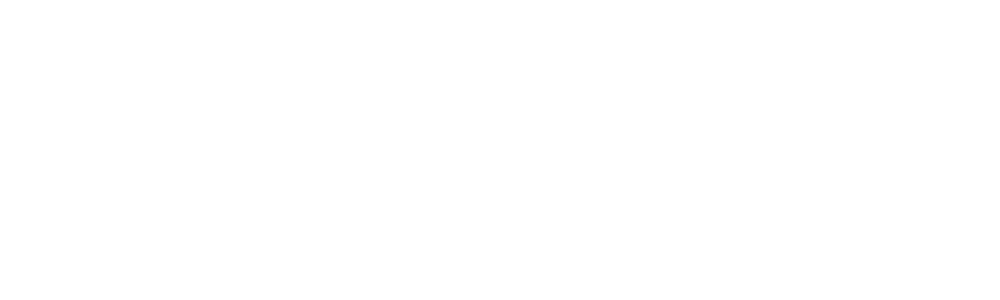

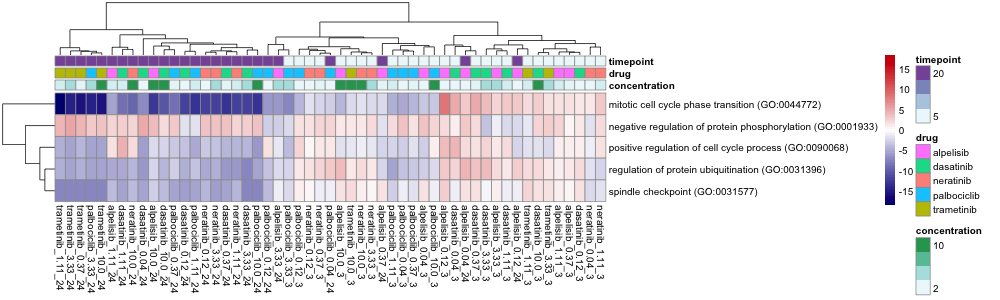

In [99]:
%%R -h 300 -w 1000 -i filtered_enrichment_dataframe,sample_metadata_dataframe
pheatmap::pheatmap(filtered_enrichment_dataframe,
                   annotation_col=sample_metadata_dataframe,
                   col=colorRampPalette(c('navyblue', 'white', 'red3'))(100),
                   breaks=seq(-max(abs(filtered_enrichment_dataframe)), max(abs(filtered_enrichment_dataframe)), length.out=101))